 # Benchmark Visualization

### Interactive Protocol

In [17]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np
from IPProverLinear import InteractiveLinearProver
from IPProverNaive import InteractiveNaiveProver
from IPVerifier import InteractiveVerifier
from polynomial import makeMVLinearConstructor

from typing import Dict, Tuple, List

In [2]:
def randomPolynomial(num_variables: int, field_size: int):
    num_terms = 2**num_variables
    m = makeMVLinearConstructor(num_variables, field_size)
    d: Dict[int, int] = dict()
    for _ in range(num_terms):
        d[random.randint(0, 2**num_variables - 1)] = random.randint(0, 100)

    return m(d)

In [6]:
def naiveTrial(num_variables: int, field_size: int) -> Tuple[float, float]:
    """
    :param num_variables:
    :param field_size:
    :return: prover time, verifier time (in millisecond)
    """
    p = randomPolynomial(num_variables, field_size)
    pv = InteractiveNaiveProver(p)

    t0 = time.time() * 1000
    s = pv.calculateSum([])
    t1 = time.time() * 1000
    t = t1 - t0

    v = InteractiveVerifier(random.randint(0, 0xFFFFFFFF), p, s)
    t0 = time.time() * 1000
    result, vT = pv.attemptProve(v)
    t1 = time.time() * 1000
    t += t1 - t0 - vT


    assert result
    return t, vT


In [12]:
def linearTrial(num_variables: int, field_size: int) -> Tuple[float, float]:
    """
    :param num_variables:
    :param field_size:
    :return: prover time, verifier time (in millisecond)
    """
    p = randomPolynomial(num_variables, field_size)
    pv = InteractiveLinearProver(p)

    t0 = time.time() * 1000
    A, s = pv.calculateTable()
    t1 = time.time() * 1000
    t = t1 - t0

    v = InteractiveVerifier(random.randint(0, 0xFFFFFFFF), p, s)
    t0 = time.time() * 1000
    vT = pv.attemptProve(A, v)
    t1 = time.time() * 1000
    t += t1 - t0 - vT


    assert v.convinced
    return t, vT

In [24]:
def experiment() -> Tuple[List[int], List[int], List[int], List[int]]:
    SIZE = 745765749931
    num_variables = [7,8,9,10,11,12]
    prover_naive_time = []
    prover_linear_time = []
    verifier_time = []

    for n in num_variables:
        nT, _ = naiveTrial(n, SIZE)
        lT, vT = linearTrial(n, SIZE)
        prover_naive_time.append(nT)
        prover_linear_time.append(lT)
        verifier_time.append(vT)

    return num_variables, prover_naive_time, prover_linear_time, verifier_time

In [25]:


nVs, nTs, lTs, vTs= experiment()

In [33]:

def draw(nVs: List[int], nTs: List[int], lTs: List[int], vTs: List[int]):
    plt.figure(figsize=(4,4))
    plt.suptitle("Running time(ms) for naive prover, linear prover, and verifier. ")
    plt.plot(nVs, vTs, color='orange', label="verifier")
    plt.plot(nVs, nTs, color='black', label='naive prover')
    plt.plot(nVs, lTs, color='blue', label='linear prover')
    plt.show()

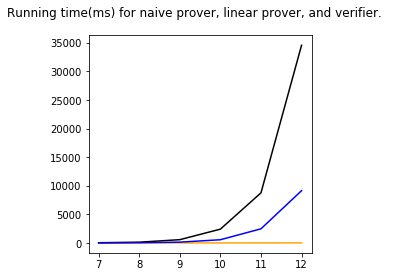

In [34]:
draw(nVs, nTs, lTs, vTs)

